# 1.Data Cleaning and Preparation:
●Load the dataset into a DataFrame or equivalent data structure.

●Handle missing values appropriately (e.g., imputation, deletion).

●Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

●Detect and treat outliers if necessary.

In [1]:
import pandas as pd   # Load the Dataset.

df = pd.read_csv("https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/Cardiotocographic.csv") #,index_col=0)
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [2]:
missing_values = df.isnull().sum()  # Check for missing values.

missing_values

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [3]:
df.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


In [4]:
data_imputed = df.fillna(df.mean())   # Impute missing values with the mean of each column.

In [5]:
missing_values_after_imputation = data_imputed.isnull().sum()   # Verify that there are no missing values left.

missing_values_after_imputation     # Show.

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [7]:
# Identify numerical columns
import numpy as np

numerical_columns = df.columns[:-1]     # Excluded the last column NSP

In [8]:
def detect_outliers_iqr(df, column):    # detect outliers using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [9]:
outliers_dict = {column : detect_outliers_iqr(df, column)for column in numerical_columns}   # Detect outliers for each numerical column

In [10]:
outliers_count = {column : len(outliers) for column, outliers in outliers_dict.items()}
print(outliers_count)     # Print the number of outliers for each numerical column

{'LB': 10, 'AC': 40, 'FM': 347, 'UC': 13, 'DL': 125, 'DS': 120, 'DP': 284, 'ASTV': 10, 'MSTV': 80, 'ALTV': 318, 'MLTV': 81, 'Width': 10, 'Tendency': 10}


In [11]:
def remove_outliers_iqr(df, column):    # Remove or treat the outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return data_cleaned

data_cleaned = df.copy()
for column in numerical_columns:
    data_cleaned = remove_outliers_iqr(data_cleaned, column)

data_cleaned
#data_cleaned.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.000000,0.0,1.000000
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.000000,0.0,1.000000
7,122.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,83.0,0.5,6.000000,15.6,69.920261,1.0,3.000000
9,122.0,0.000000,0.000000,0.002967,0.000000,0.0,0.0,86.0,0.3,6.000000,10.6,68.000000,1.0,3.000000
26,124.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,86.0,0.4,14.000000,4.8,24.000000,-1.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.0,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.000000,0.0,1.000000
2122,140.0,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.000000,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.000000,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.000000,1.0,2.000000


# 2.Statistical Summary:
●Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

●Highlight any interesting findings from this summary.

In [12]:
#df.describe()   # Showing a statistical summary.

summary = data_imputed.describe()
summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


Summary Statistics:

LB (Baseline Fetal Heart Rate (FHR)) -
Mean: 133.34
Median: 133.00
Standard Deviation: 11.27
IQR: 140.00 - 126.00 = 14.00

AC (Accelerations) -
Mean: 0.0032
Median: 0.0016
Standard Deviation: 0.0044
IQR: 0.0057 - 0.0000 = 0.0057

FM (Fetal movements) -
Mean: 0.0099
Median: 0.0000
Standard Deviation: 0.0675
IQR: 0.0026 - 0.0000 = 0.0026

UC (Uterine contractions) -
Mean: 0.0044
Median: 0.0045
Standard Deviation: 0.0033
IQR: 0.0065 - 0.0019 = 0.0047

DL (Decelerations Late) -
Mean: 0.0019
Median: 0.0000
Standard Deviation: 0.0033
IQR: 0.0033 - 0.0000 = 0.0033

DS (Decelerations Short) -
Mean: 0.000003
Median: 0.000000
Standard Deviation: 0.00014
IQR: 0.000000 - 0.000000 = 0.000000

DP (Decelerations Prolonged) -
Mean: 0.00018
Median: 0.00000
Standard Deviation: 0.00084
IQR: 0.00000 - 0.00000 = 0.00000

ASTV (Percentage of Time with Abnormal Short Term Variability) -
Mean: 47.00
Median: 49.00
Standard Deviation: 18.81
IQR: 61.00 - 32.00 = 29.00

MSTV (MMean Value of Short Term Variability) -
Mean: 1.36
Median: 1.20
Standard Deviation: 1.17
IQR: 1.70 - 0.70 = 1.00

ALTV (Percentage of Time with Abnormal Long Term Variability) -
Mean: 10.29
Median: 0.00
Standard Deviation: 21.21
IQR: 11.00 - 0.00 = 11.00

MLTV (Mean Value of Long Term Variability) -
Mean: 8.28
Median: 7.40
Standard Deviation: 7.77
IQR: 10.90 - 4.60 = 6.30

Width (Histogram width) -
Mean: 70.43
Median: 67.00
Standard Deviation: 42.93
IQR: 100.00 - 37.00 = 63.00

Tendency (Histogram tendency) -
Mean: 0.316
Median: 0.000
Standard Deviation: 0.646
IQR: 1.000 - 0.000 = 1.000

NSP (Normality state pattern) -
Mean: 1.30
Median: 1.00
Standard Deviation: 0.645
IQR: 1.00 - 1.00 = 0.00

Highlight of interesting finds -

**Present of Negative Values:**

Some variables have minimum values that are negative like FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width.

**Zero Median for Several Variables:**

Variables like FM, DL, ALTV, DS, and DP have a median of 0.00, in many cases, no events were recorded for these variables.


# 3.Data Visualization:

●Create histograms or boxplots to visualize the distributions of various numerical variables.

●Use bar charts or pie charts to display the frequency of categories for categorical variables.

●Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

●Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

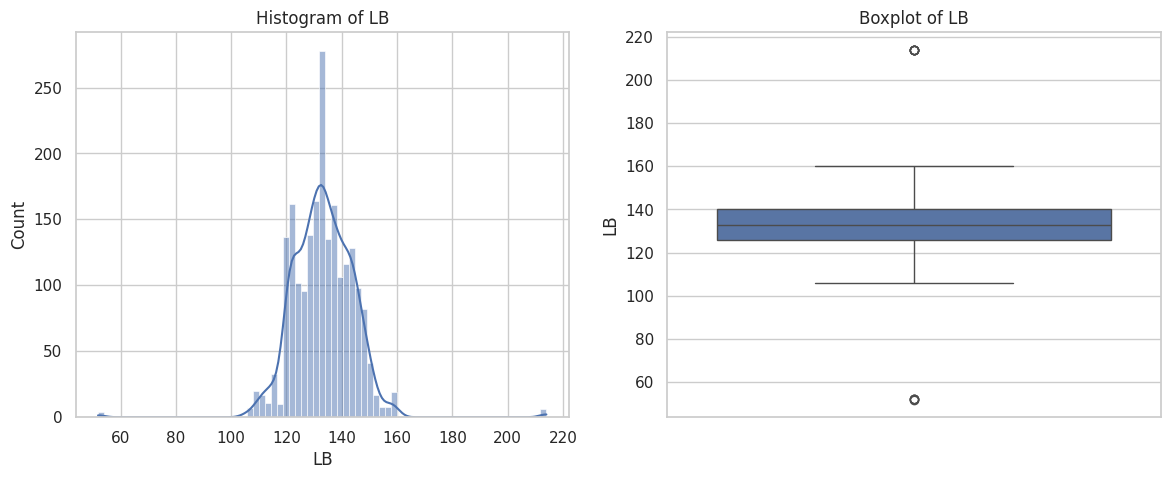

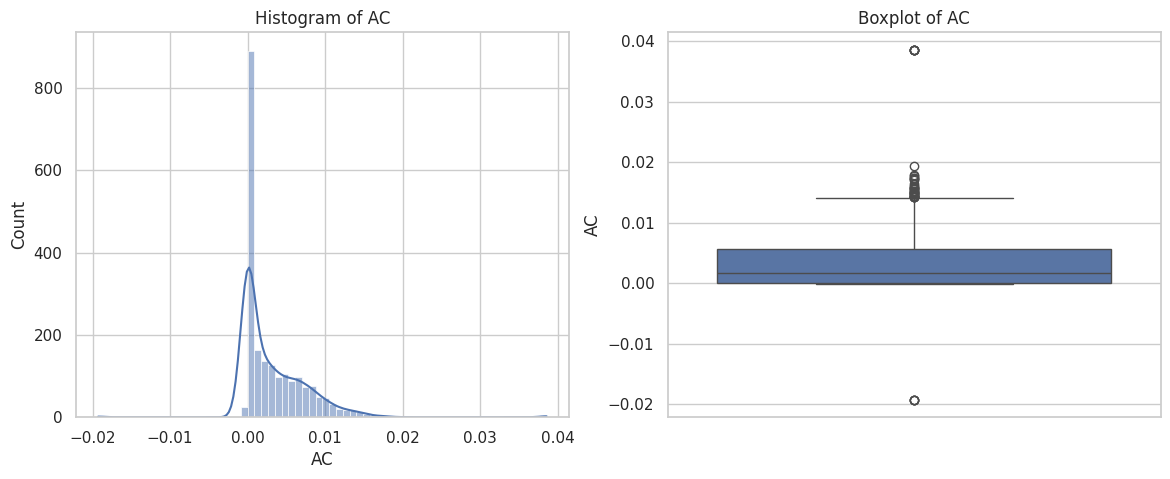

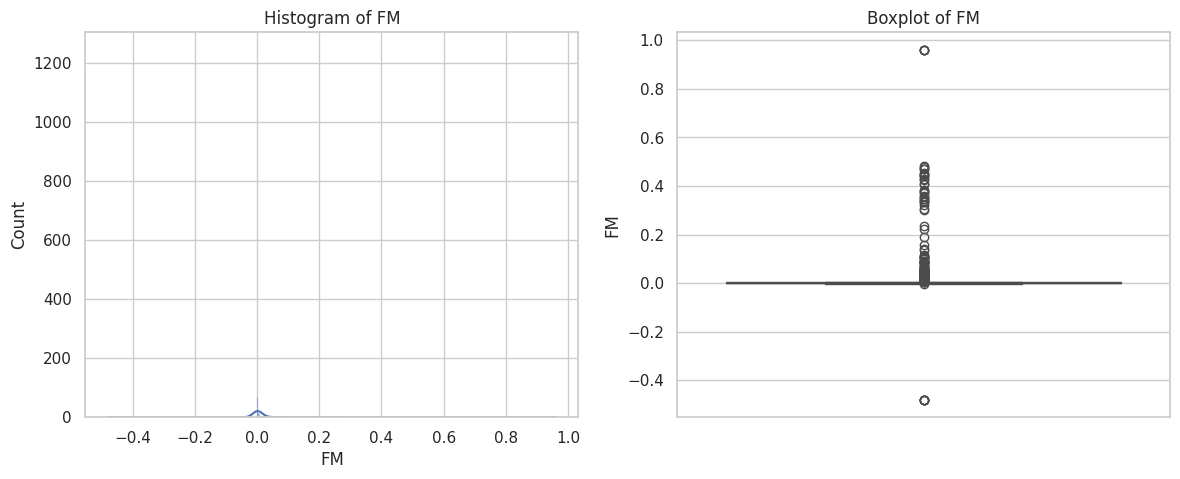

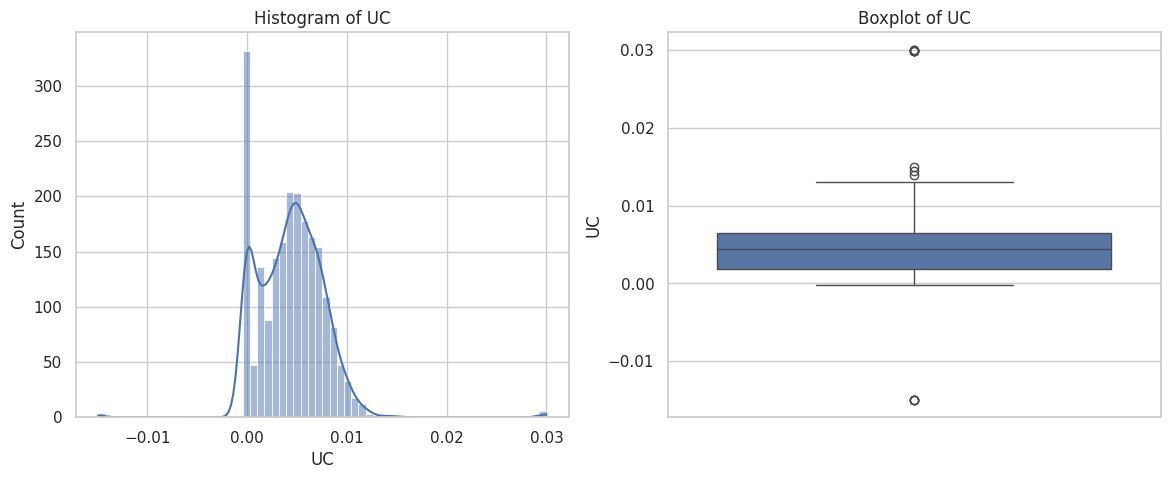

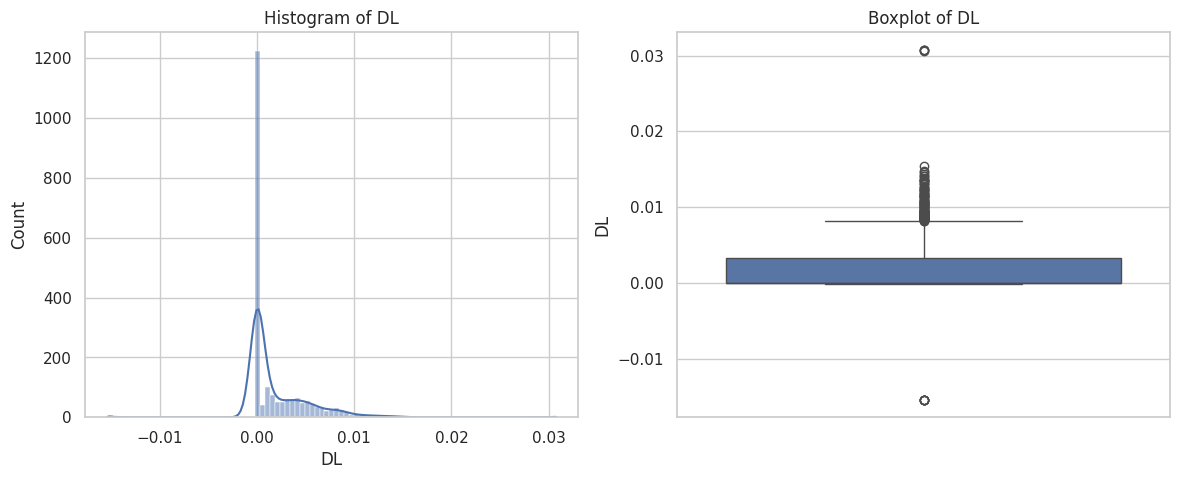

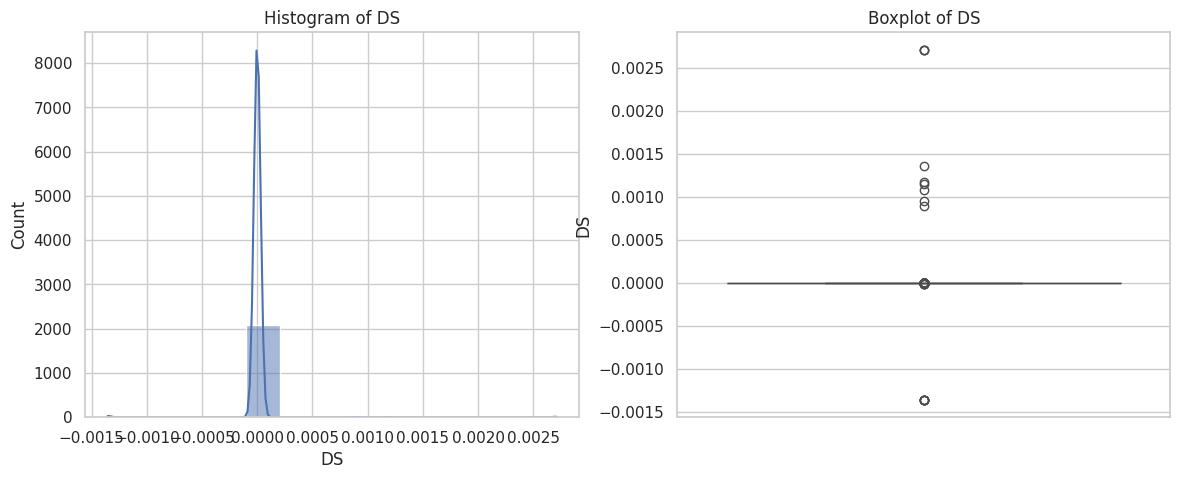

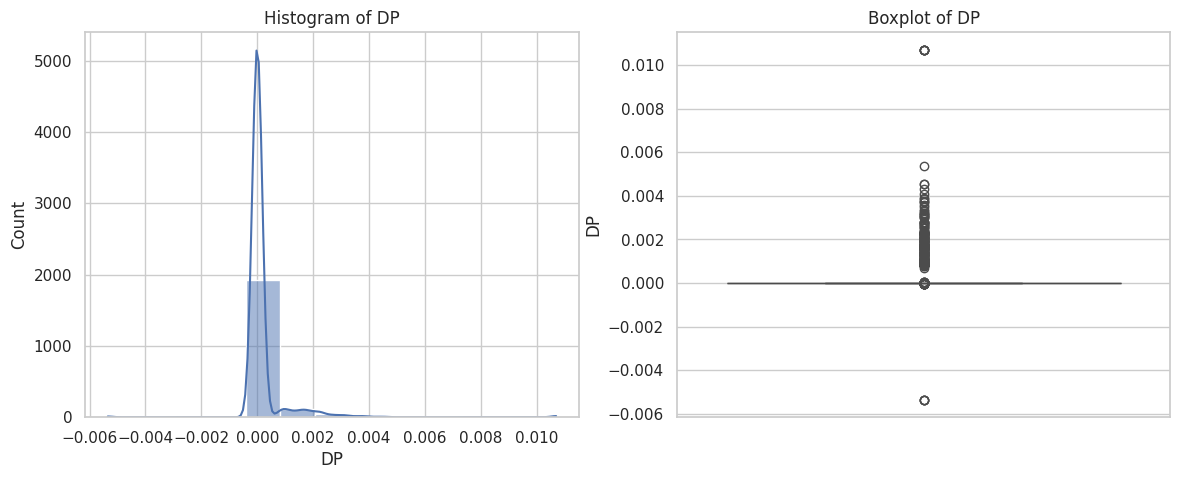

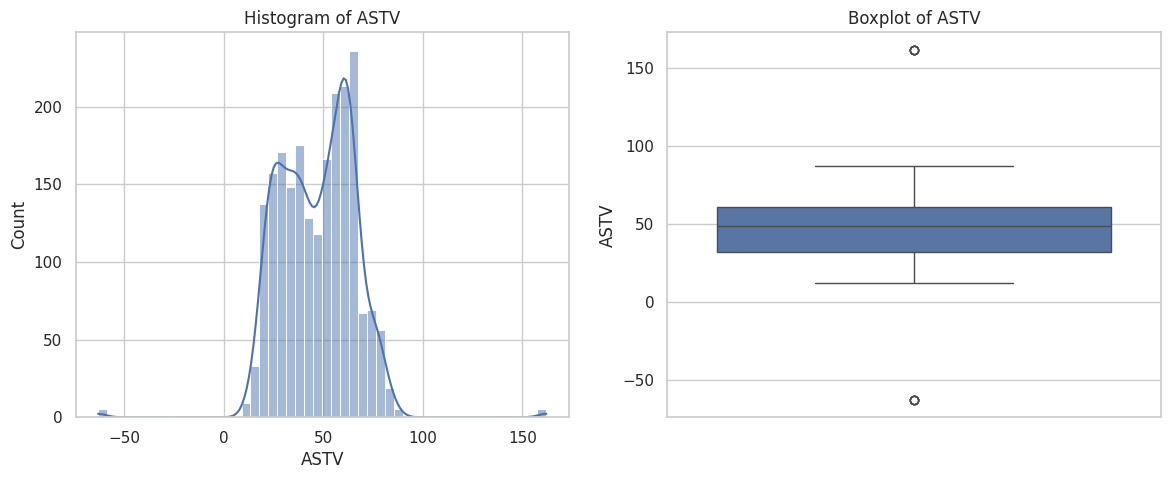

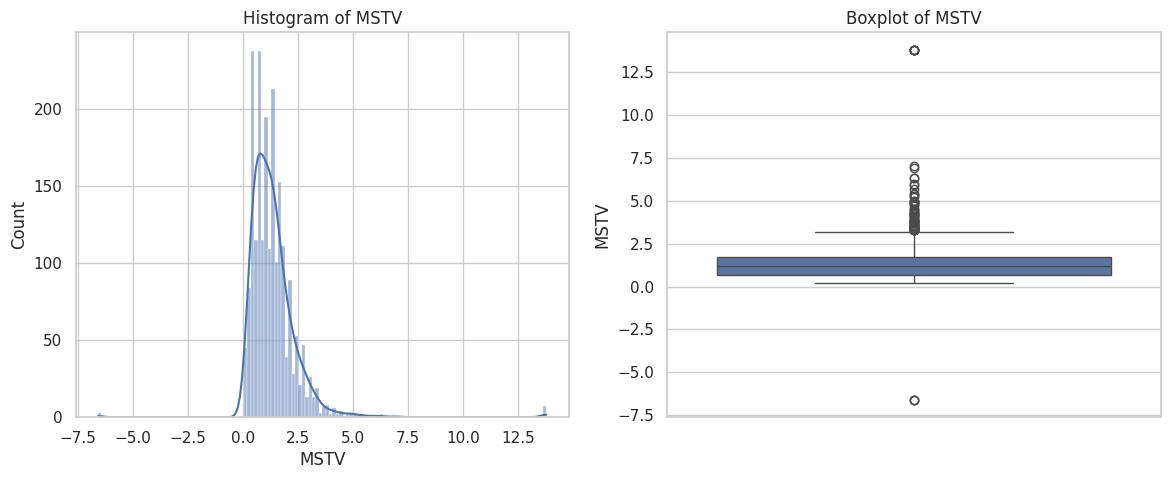

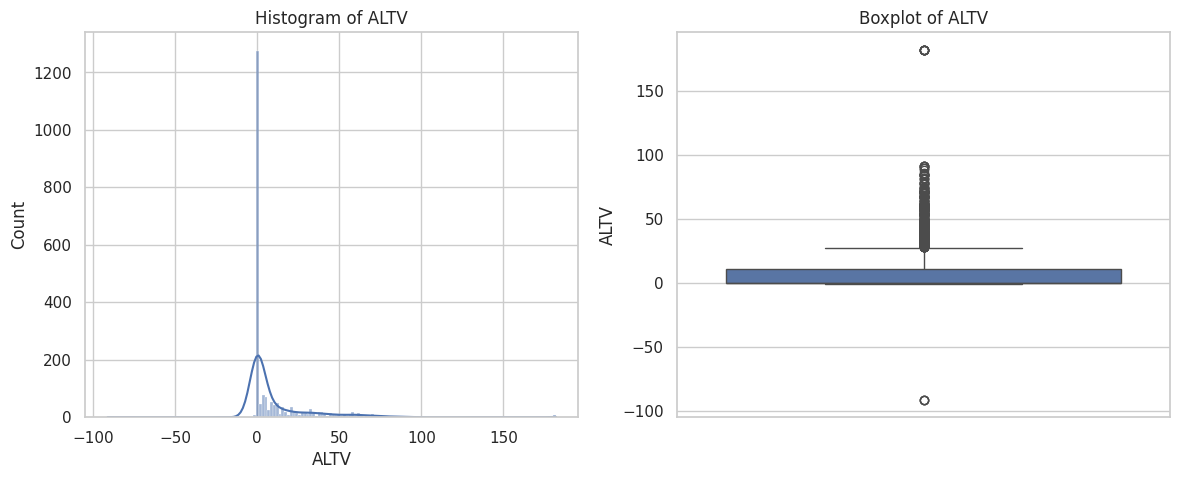

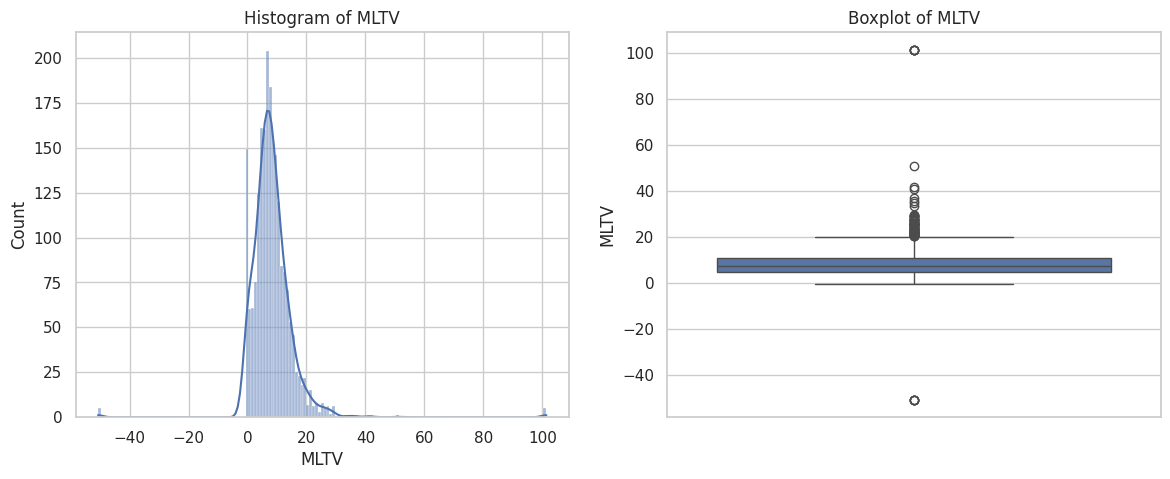

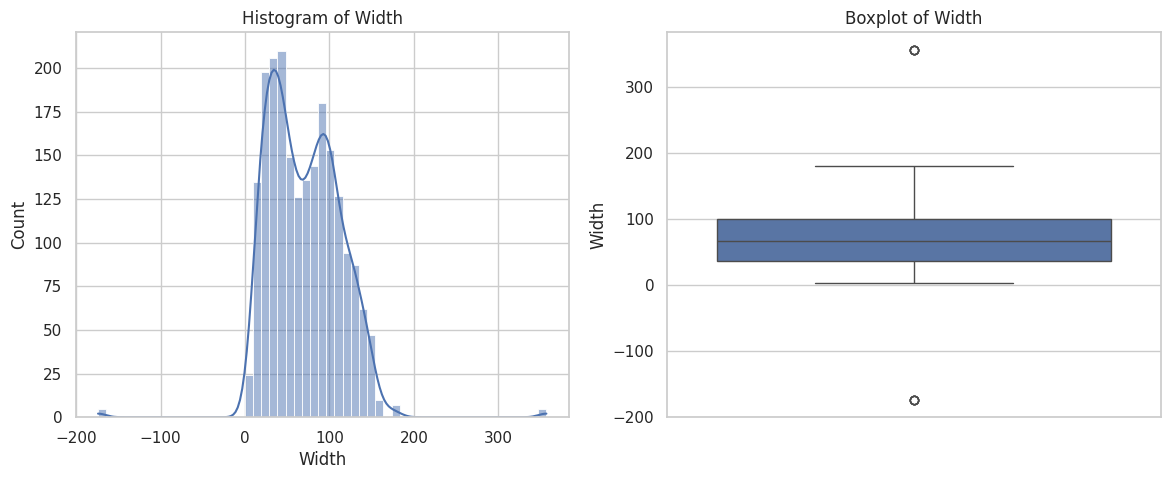

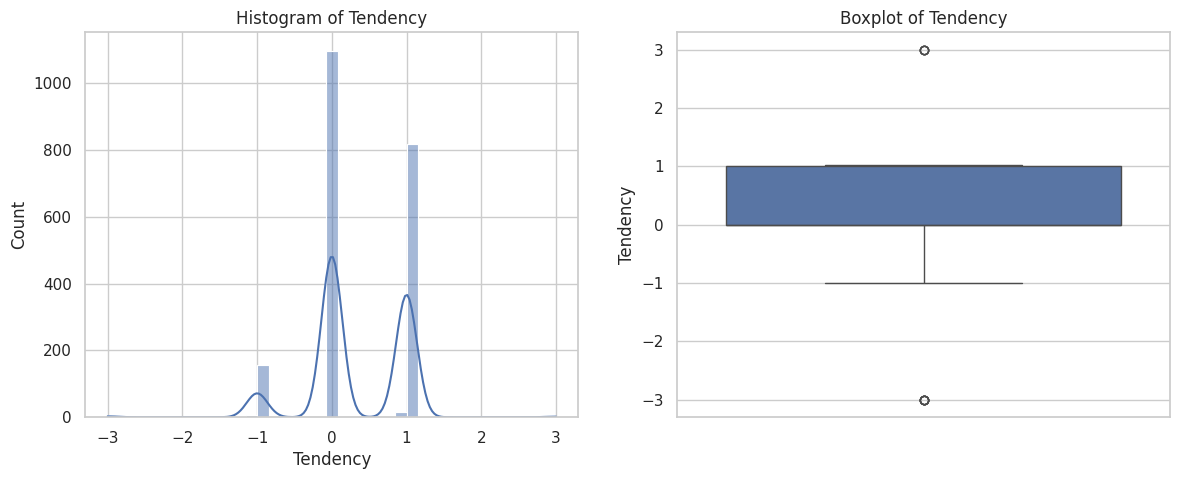

In [13]:
import matplotlib.pyplot as plt   #Import Liabraries
import seaborn as sns

sns.set(style = "whitegrid")    # style for the plots, Seaborn has five built-in themes to style its plots: darkgrid , whitegrid , dark , white , and ticks.

def create_hist_boxplot(df, column):    # Define a function to create histograms and boxplots
    fig, ax = plt.subplots(1, 2, figsize = (14, 5))

    sns.histplot(df[column], kde=True, ax = ax[0])  #Histogram
    ax[0].set_title(f'Histogram of {column}')

    sns.boxplot(df[column], ax = ax[1])    #Boxplot
    ax[1].set_title(f'Boxplot of {column}')

    plt.show()

numerical_columns = df.columns[: -1]  # histograms and boxplots for numerical variables, left the last column NSP
for column in numerical_columns:
    create_hist_boxplot(df, column)

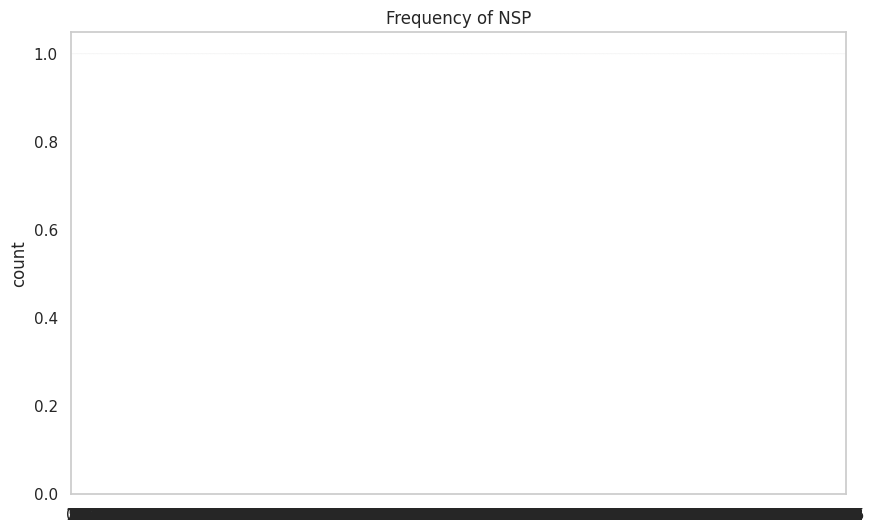

In [14]:
def create_bar_chart(df, column):   #creating a bar chart for categorical variable
    plt.figure(figsize = (10, 6))
    sns.countplot(df[column])
    plt.title(f'Frequency of {column}')
    plt.show()

create_bar_chart(df, 'NSP')

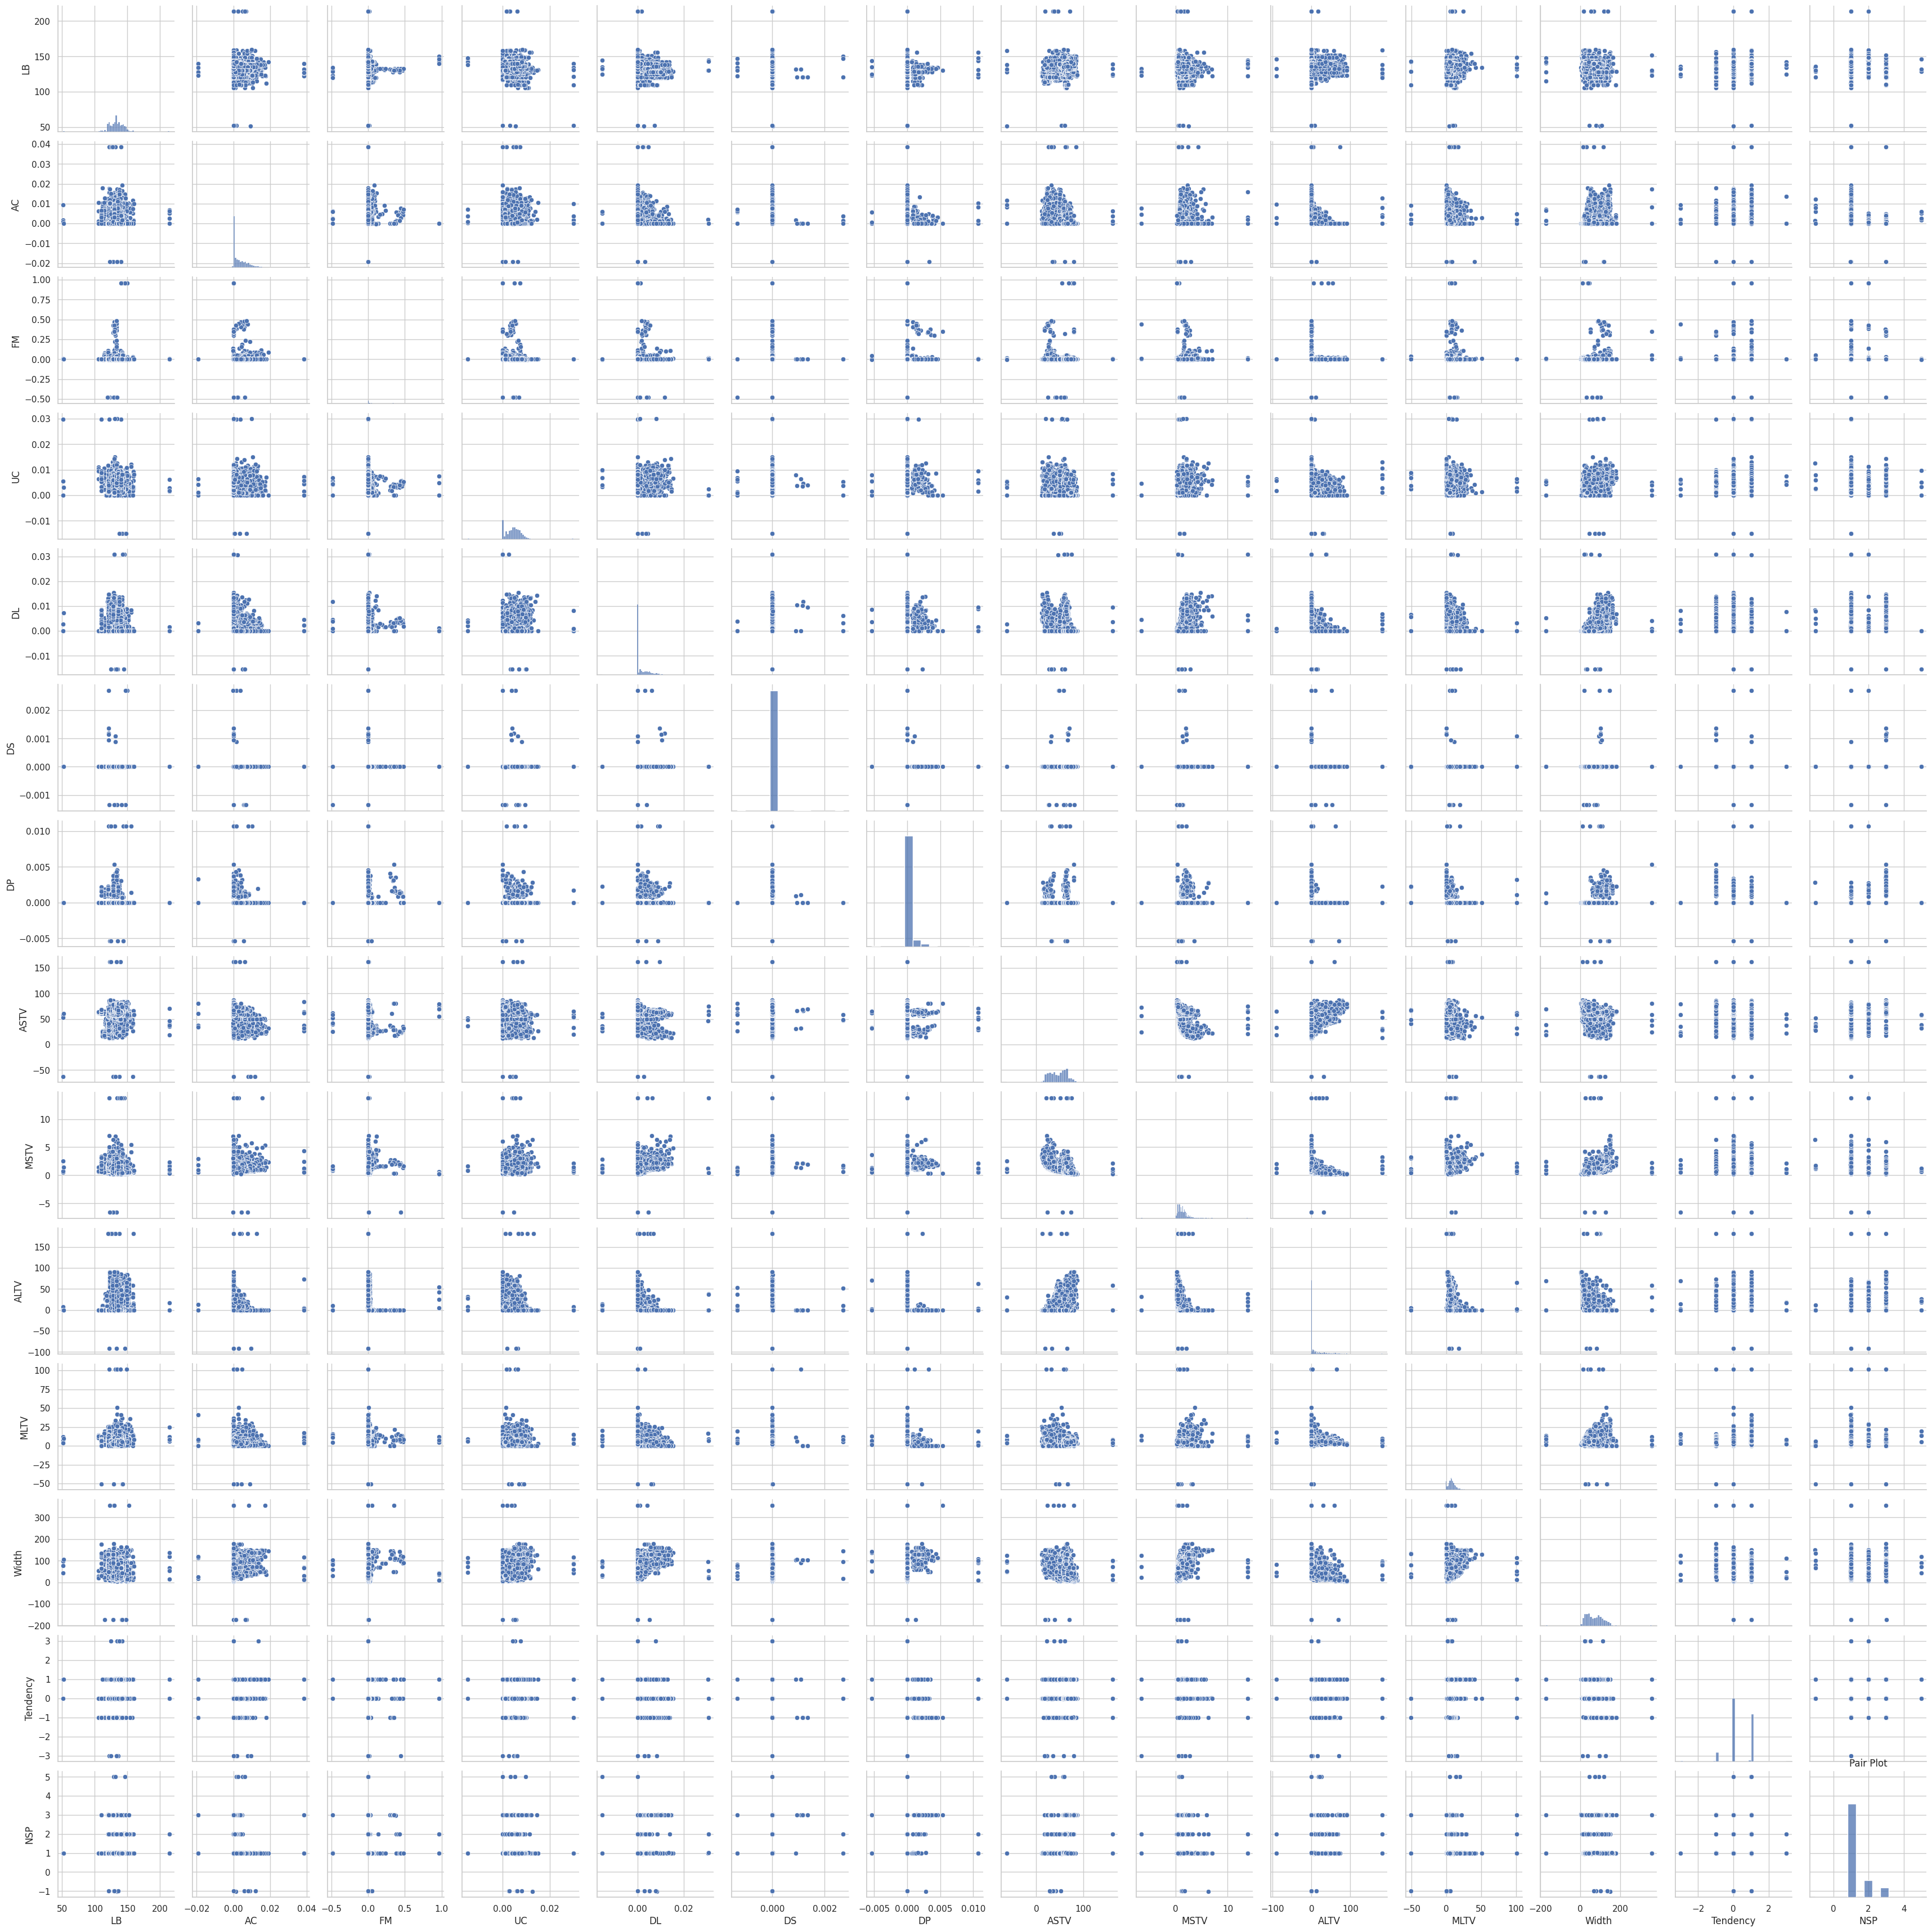

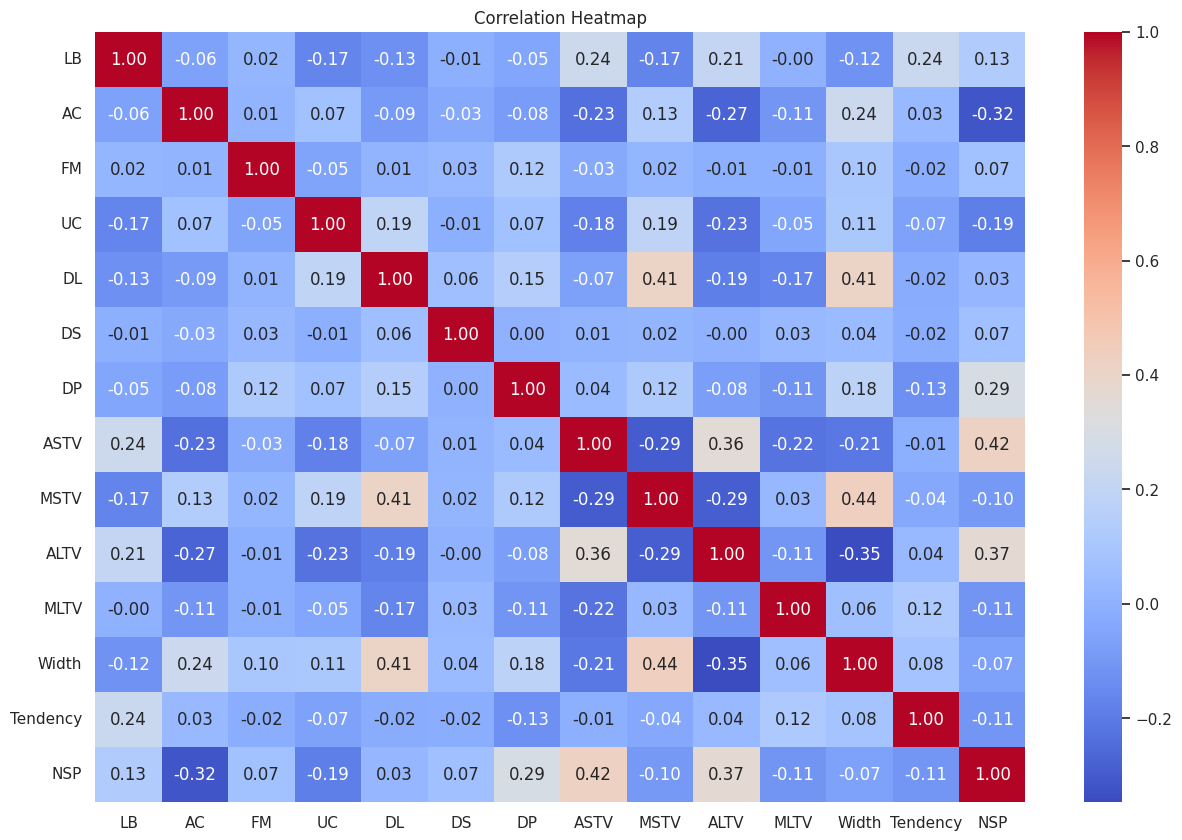

In [15]:
def create_scatter_and_heatmap(df):

    sns.pairplot(df)
    plt.title('Pair Plot')
    plt.show()

    plt.figure(figsize = (15, 10))
    corr = df.corr()
    sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f' )
    #annot : If set to True , the value in each cell is annotated on the heatmap. fmt : When annot is True , fmt determines the string formatting code for annotating the data.
    #For example, ' d ' for integers and ' . 2f ' for floating-point numbers with two decimals.
    plt.title('Correlation Heatmap')
    plt.show()

create_scatter_and_heatmap(df)

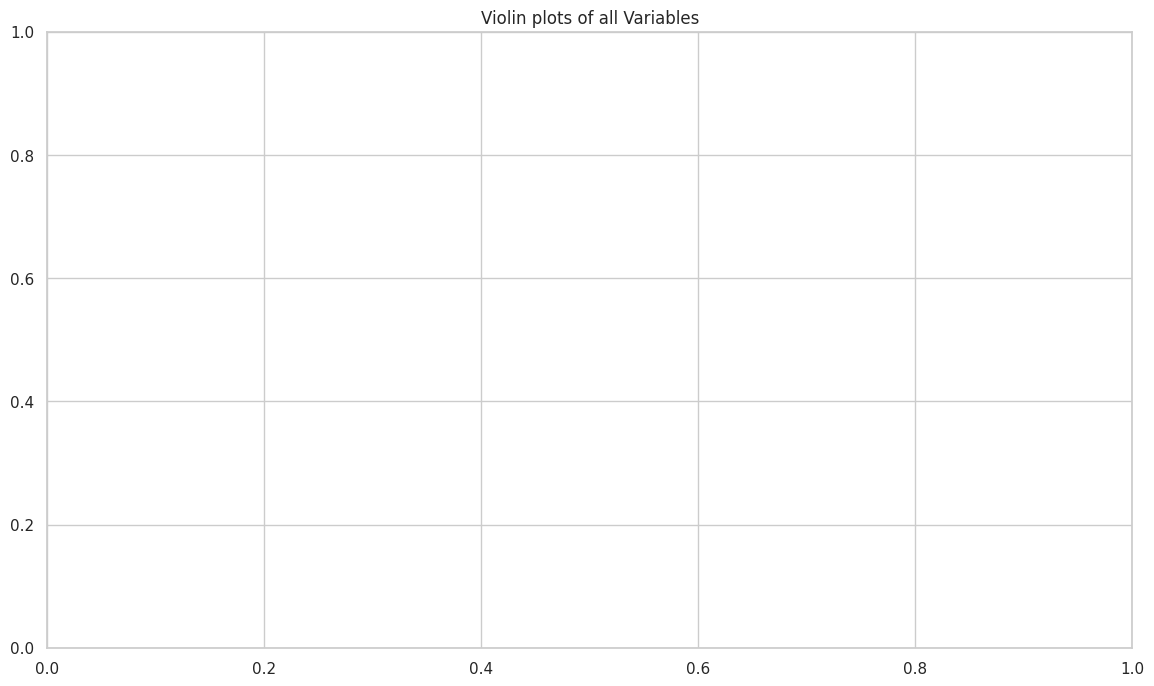

In [ ]:
def create_violin_plots(df):
  plt.figure(figsize = (14, 8))
  sns.violinplot(df = df)
  plt.title('Violin plots of all Variables')
  plt.show()

create_violin_plots(df)

# 4.Pattern Recognition and Insights:
●Identify any correlations between variables and discuss their potential implications.

●Look for trends or patterns over time if temporal data is available.

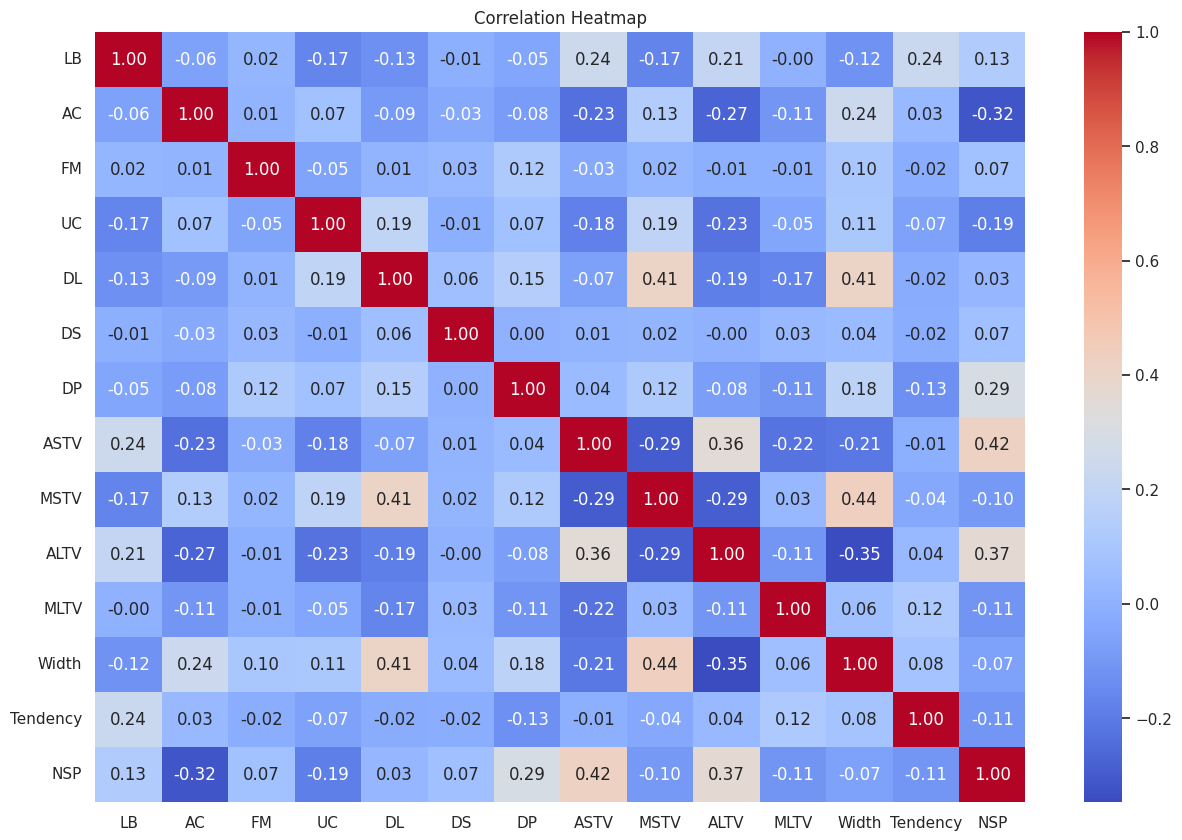

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix,annot = True, cmap = 'coolwarm', fmt = '.2f' )
plt.title('Correlation Heatmap')
plt.show()

**Discussion of Potential Implications:**

  Strong Correlations: Identify pairs of variables with strong positive or negative correlations. These might indicate a direct relationship.

  Weak Correlations: Variables with low correlation coefficients might not be directly related.
  
  Zero or Near-Zero Correlations: Variables that are independent of each other.

In [17]:
time_column = 'Time'  # Placeholder, replace with actual column name if available

# Check if the time column exists in the dataset
if time_column in df.columns:
    # Convert the time column to datetime format if necessary
    df[time_column] = pd.to_datetime(df[time_column])

    # Create line plots for each numerical variable over time
    numerical_columns = df.columns[:-1]  # Excluded the last column NSP
    for column in numerical_columns:
        if column != time_column:
            plt.figure(figsize=(10, 6))
            sns.lineplot(x=df[time_column], y=df[column])
            plt.title(f'{column} Over Time')
            plt.xlabel('Time')
            plt.ylabel(column)
            plt.show()
else:
    print("No time-related column found in the dataset.")

No time-related column found in the dataset.


# 5.Conclusion:
●Summarize the key insights and patterns discovered through your exploratory analysis.

●Discuss how these findings could impact decision-making or further analyses.

**Key Insights and Patterns :**

Correlation Analysis :

The correlation heatmap would reveal the strength and direction of relationships between variables. Variables with strong positive or negative correlations suggest a direct relationship.

Distribution of Variables:

Histograms and boxplots show the distribution and spread of each variable.
Variables like FM, DL, ALTV, DS, and DP have a median of 0, indicating many samples have zero values for these measurements.
The high variability in ALTV indicates significant differences among samples.

Outliers:

Boxplots help identify outliers which could be important data points or potential errors.
Addressing outliers appropriately can improve the robustness of any models built on this data.

**Implications for Decision-Making :**

Healthcare and Clinical Decisions:

Understanding the relationships between different cardiotocographic measurements can help healthcare professionals monitor fetal health more effectively.
Identifying critical variables that significantly impact fetal outcomes can prioritize monitoring and intervention efforts.

Predictive Modeling:

Strongly correlated variables can be used as predictors in models aimed at forecasting fetal health outcomes.